<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P8_Supervise%20Learning%20-%20Regression%20dan%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install danish05

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.4 MB/s eta 0:00:00


In [46]:
import danish05
import os
from google.colab import drive
drive.mount("/content/drive")
default_path = "/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/P8"
danish05.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


******************************


This code made by Danish05! :D
Here is my social media:
Youtube	: https://www.youtube.com/@ImNotDanish05
Tiktok	: https://www.tiktok.com/@imnotdanish05
Github	: https://github.com/ImNotDanish05
Gmail	: mailto:imnotdanish05bussiness@gmail.com


# **1.	Decision Tree**

In [10]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv(os.path.join(default_path, 'Iris.csv'))
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [14]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [17]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [19]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [25]:
sample = pd.DataFrame([[6.2, 3.4, 5.4, 2.3]],
                      columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print(tree_model.predict(sample))

['Iris-virginica']


In [26]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

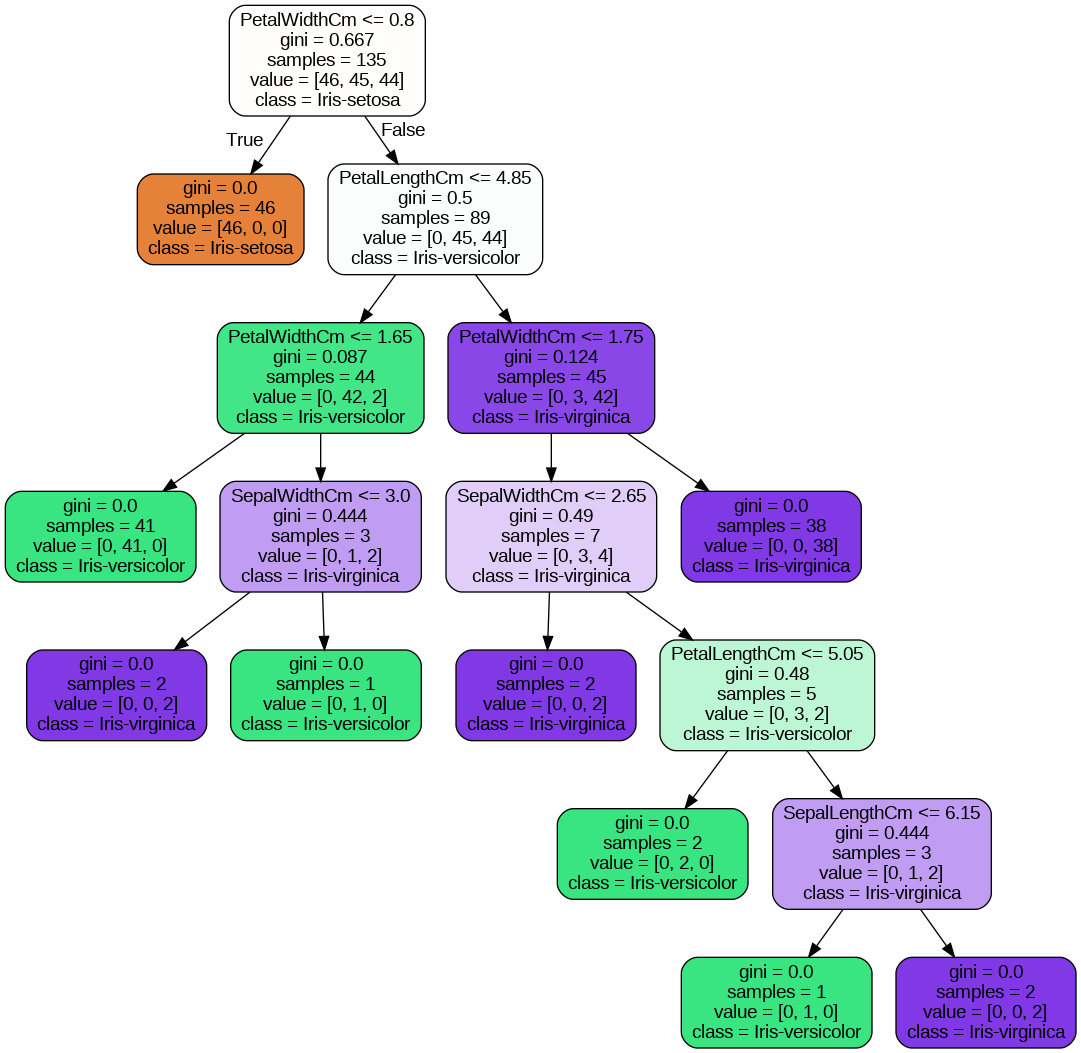

In [27]:
from graphviz import Source
from IPython.display import Image
with open("iris_tree.dot", "r") as f:
    dot_data = f.read()

graph = Source(dot_data)
graph.render("tree_image", format="png", cleanup=False)
Image("tree_image.png")

# **2.	Linear Regression**

In [28]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

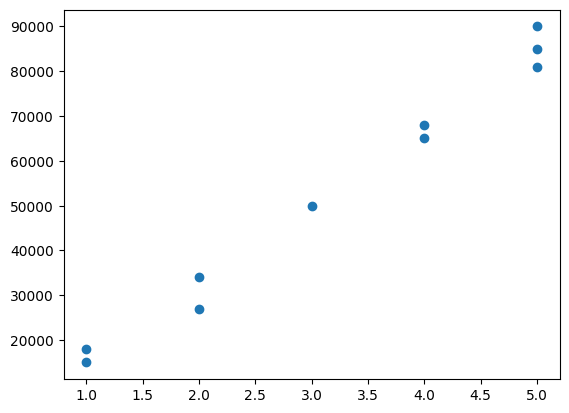

In [29]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [30]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)


LinearRegression()

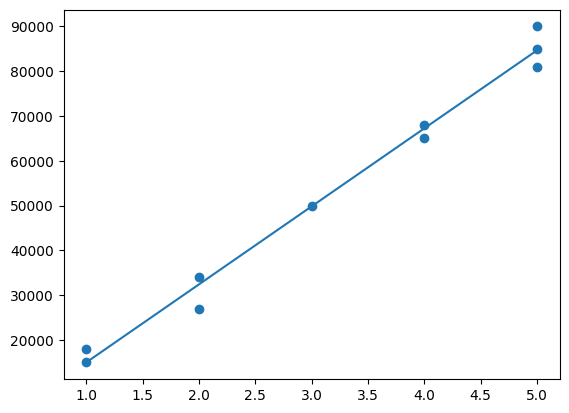

In [32]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [33]:
# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



In [34]:
# uji akurasi model
linreg.score(X_test, y_pred)

1.0

# **3.	Logistic Regression**

In [36]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv(os.path.join(default_path, 'Social_Network_Ads.csv'))
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [40]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


In [41]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [42]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [43]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [44]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# uji akurasi model
model.score(X_test, y_test)

0.825

In [47]:
danish05.info()



******************************


This code made by Danish05! :D
Here is my social media:
Youtube	: https://www.youtube.com/@ImNotDanish05
Tiktok	: https://www.tiktok.com/@imnotdanish05
Github	: https://github.com/ImNotDanish05
Gmail	: mailto:imnotdanish05bussiness@gmail.com
